### A propos du dataset 

Le but de ce rapport est de prévoir les ventes de maisons dans le comté de King, dans l'État de Washington, aux États-Unis, en utilisant la régression linéaire simple. L'ensemble de données est constitué de données historiques sur les maisons vendues entre mai 2014 et mai 2015.
Nous allons prédire les ventes de maisons dans le comté de King avec une précision d'au moins 75 à 80 % et comprendre quels facteurs sont responsables de la valeur plus élevée des propriétés - 650 000 $ et plus".

L'ensemble de données comprend les prix des maisons de King County, une région de l'État de Washington, et couvre également Seattle. Ces données ont été publiées/diffusées sous CC0 : Domaine public. Malheureusement, l'utilisateur n'a pas indiqué la source des données. Veuillez trouver la citation et la description de la base de données dans le Glossaire et la Bibliographie.
L'ensemble de données se composait de 21 variables et de 21613 observations.


### Importation des bibliothèques 

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 


### Collecte de données : data collecting 

In [4]:
my_data=pd.read_csv("kc_house_data.csv")
my_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Exploration des données : Data exploration 

In [6]:
names=list(my_data.columns)
print(names)

['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


In [7]:
my_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000219A50F8FC8>,
      dtype=object)

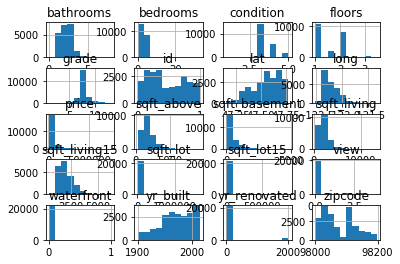

In [9]:
my_data.hist()

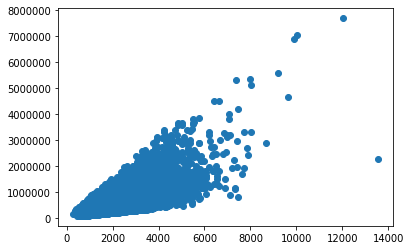

In [10]:
plt.scatter(my_data.sqft_living,my_data.price)

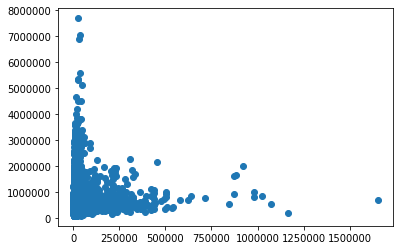

In [13]:
plt.scatter(my_data.sqft_lot,my_data.price)

### Train & Test 

In [29]:
X_space=my_data['sqft_living']
y_house=my_data["price"]

In [30]:
x = np.array(X_space)
print(x)
y=np.array(y_house)
print(y)

[1180 2570  770 ... 1020 1600 1020]
[221900. 538000. 180000. ... 402101. 400000. 325000.]


In [32]:
print(x.ndim)
print(y.ndim)

1
1


In [33]:
#on remarque la dimension du vecteur x est 1 alors que scikit learn nécessite un vecteur d'input de dimension 2 

In [34]:
x = np.array(X_space).reshape(-1,1)
print(x)
y=np.array(y_house)
print(y)
print()
print(x.ndim)
print(y.ndim)


[[1180]
 [2570]
 [ 770]
 ...
 [1020]
 [1600]
 [1020]]
[221900. 538000. 180000. ... 402101. 400000. 325000.]

2
1


In [35]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=1/3,random_state=1)

In [36]:
from sklearn.linear_model import LinearRegression

In [39]:
Lr_model=LinearRegression()

In [41]:
Lr_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
prediction=Lr_model.predict(X_test)

In [51]:
from sklearn.metrics import r2_score 
print("accuracy est : ",(r2_score(y_test,prediction)))

accuracy est :  0.4983660359729005


#ce model n'est pas classifié comme un bon model car la précision est inférieur à 0.5 , il faut qu'on travaille toujours à l'amélioration de la précision du modèle. Il s'agit d'un code très simple avec peu de fonctionnalités.

In [52]:
print ('Coefficients: ', Lr_model.coef_)              # le meilleure coefficient du droit pour notre model (pente du droite)
print ('Intercept: ',Lr_model.intercept_)  

Coefficients:  [275.49551942]
Intercept:  -34098.2642738648


In [57]:
 Lr_model.coef_[0]

275.4955194171286

In [58]:
Lr_model.intercept_

-34098.2642738648

### Traçage des sorties : 

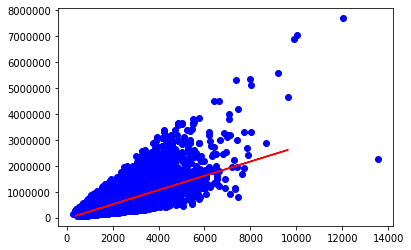

In [60]:
plt.scatter(x,y,color='blue')
plt.plot(X_train,Lr_model.coef_[0]*X_train + Lr_model.intercept_ ,'-r')
plt.show()

In [62]:
#on remarque d'apres cette figure montre que la relation entre la droite ajusté issue du l'algorithme n'est pas strictement 
#en relation linéaire avec les données de training ceci explique bien que la précision n'est pas bonne.